In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx

plt.rcParams['font.sans-serif'] = ['SimHei']  # 黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决无法显示符号的问题
palette = 'deep'
sns.set(font='SimHei', font_scale=1.2, style='whitegrid', palette=palette)  # 解决Seaborn中文显示问题

In [22]:
场地处理能力df = pd.read_excel('../../../preprocess/场地处理能力.xlsx')
场地处理能力df.set_index('场地', inplace=True)
线路运输能力df = pd.read_excel('../../../preprocess/线路运输能力.xlsx')
rawData = pd.read_excel('../../../T1/解题/时间窗口为5-第一问结果LTSM-物流网络历史货量数据.xlsx')
rawDataMelt = pd.melt(pd.merge(rawData.iloc[:, :2], rawData.iloc[:, -31:], left_index=True, right_index=True),
                      id_vars=['场地1', '场地2'], value_name='货量', var_name='日期')
totalEdgeLen = len(rawData)
print(f'总线路数量：{totalEdgeLen}')
print(rawDataMelt.dtypes)
rawDataMelt

总线路数量：1049
场地1     int64
场地2     int64
日期     object
货量      int64
dtype: object


,场地1,场地2,日期,货量
0,1,8,2023-01-01,3
1,2,3,2023-01-01,1
2,2,4,2023-01-01,2
3,2,5,2023-01-01,10
4,2,8,2023-01-01,2
...,...,...,...,...
32514,76,8,2023-01-31,15
32515,76,10,2023-01-31,13
32516,76,14,2023-01-31,1
32517,76,62,2023-01-31,4


In [23]:
关闭的场地 = 9

In [24]:
全年线路负载率df = pd.read_excel('../../../T2/学术仿真/全年线路负载率df.xlsx')
全年线路负载率df = 全年线路负载率df.set_index(['场地1', '场地2'])
全年线路负载率df

货量       负载率
场地1 场地2                    
1   8    3.040736  0.001388
2   3    6.353482  0.001336
    4    9.684625  0.001335
    5    5.281209  0.001391
    8    2.241787  0.001398
...           ...       ...
76  8    4.187911  0.001434
    10   3.540079  0.001442
    14   1.584757  0.001349
    62   1.977661  0.001384
77  6    2.067017  0.001416

[1049 rows x 2 columns]

In [25]:
线路运输能力df = 线路运输能力df.set_index(['场地1', '场地2'])
线路运输能力df


货量
场地1 场地2      
1   8    2190
2   3    4756
    4    7252
    5    3797
    8    1604
...       ...
76  8    2920
    10   2455
    14   1175
    62   1429
77  6    1460

[1049 rows x 1 columns]

In [26]:
# 与DC5相关的线路
向关闭场地发货的场地 = rawData[(rawData['场地2'] == 关闭的场地)]['场地1']
print(f'发送货物到关闭场地的路线数量：{len(向关闭场地发货的场地)}')
向关闭场地发货的场地

发送货物到关闭场地的路线数量：56


5        2
12       3
29       4
51       5
81       7
94       8
144     10
181     11
187     12
201     13
210     14
244     15
271     17
297     19
316     20
335     21
353     22
375     23
396     24
404     25
423     26
440     27
455     28
470     29
476     30
495     31
519     33
528     34
544     35
562     36
583     37
592     38
609     39
616     40
631     41
643     42
660     43
677     44
695     45
706     46
726     47
743     48
759     49
768     50
786     51
804     52
833     55
844     56
867     58
910     62
953     66
958     67
1001    71
1013    72
1022    73
1037    74
Name: 场地1, dtype: int64

In [27]:
rawData

,场地1,场地2,2021-01-01,2021-01-02,2021-01-03,2021-01-04,2021-01-05,2021-01-06,2021-01-07,2021-01-08,...,2023-01-22,2023-01-23,2023-01-24,2023-01-25,2023-01-26,2023-01-27,2023-01-28,2023-01-29,2023-01-30,2023-01-31
0,1,8,3,3,3,3,3,3,3,3,...,4,4,4,4,5,5,5,5,5,5
1,2,3,9,9,9,9,9,9,9,9,...,3,4,4,4,4,4,4,4,4,4
2,2,4,2,2,2,2,2,2,2,2,...,4,4,5,5,5,5,5,5,5,5
3,2,5,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,6,5
4,2,8,2,2,2,2,2,2,2,2,...,4,4,4,4,4,4,4,4,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1044,76,8,4,4,4,4,4,4,4,4,...,11,11,12,12,13,13,14,14,15,15
1045,76,10,3,3,3,3,3,3,3,3,...,9,10,10,11,11,12,12,13,13,13
1046,76,14,2,2,2,2,2,2,2,2,...,1,1,1,1,1,1,1,1,1,1
1047,76,62,2,2,2,2,2,2,2,2,...,3,3,3,3,3,3,4,4,4,4


In [28]:
'''
1. 找出DC5上游发货节点
2. 找出每个发货节点中负载率最大的线路，把原应发往DC5的货发往该线路
3. 画出2023年图像
'''

线路变化后的df = rawData.copy().set_index(['场地1', '场地2'])
仅仅线路变化的df = pd.DataFrame()
for 上游节点 in 向关闭场地发货的场地:
    上游节点发货线路 = rawData[rawData['场地1'] == 上游节点].copy()
    上游线路idx = 上游节点发货线路.set_index(['场地1', '场地2']).index
    上游节点发货负载最大的线路tuple = \
        全年线路负载率df[全年线路负载率df.index.isin(上游线路idx)].sort_values(['负载率'], ascending=False).index[0]
    上游节点发货负载最大的线路df = rawData[(rawData['场地1'] == 上游节点发货负载最大的线路tuple[0]) & (
            rawData['场地2'] == 上游节点发货负载最大的线路tuple[1])].reset_index(drop=True)

    原本应该发往DC5的货量df = rawData[(rawData['场地1'] == 上游节点) & (rawData['场地2'] == 关闭的场地)].reset_index(drop=True)

    叠加后df = 上游节点发货负载最大的线路df.iloc[:, 2:] + 原本应该发往DC5的货量df.iloc[:, 2:]
    print(上游节点发货负载最大的线路tuple)
    日均增量 = np.asarray(原本应该发往DC5的货量df.iloc[:, -31:].values).mean()
    叠加后df.insert(0, '日均增量', 日均增量)

    叠加后df.insert(0, '场地2', 上游节点发货负载最大的线路tuple[1])
    叠加后df.insert(0, '场地1', 上游节点发货负载最大的线路tuple[0])
    叠加后df = 叠加后df.set_index(['场地1', '场地2'])
    线路变化后的df.loc[上游节点发货负载最大的线路tuple] = 叠加后df.loc[上游节点发货负载最大的线路tuple]
    仅仅线路变化的df = pd.concat([仅仅线路变化的df, 叠加后df.reset_index()])

线路变化后的df = 线路变化后的df.reset_index()
线路变化后的df

(2, 10)
(3, 12)
(4, 23)
(5, 31)
(7, 4)
(8, 5)
(10, 23)
(11, 22)
(12, 5)
(13, 5)
(14, 17)
(15, 64)
(17, 64)
(19, 12)
(20, 64)
(21, 34)
(22, 32)
(23, 64)
(24, 4)
(25, 34)
(26, 14)
(27, 14)
(28, 14)
(29, 9)
(30, 65)
(31, 5)
(33, 65)
(34, 8)
(35, 62)
(36, 64)
(37, 54)
(38, 65)
(39, 4)
(40, 67)
(41, 3)
(42, 65)
(43, 64)
(44, 64)
(45, 81)
(46, 65)
(47, 64)
(48, 65)
(49, 9)
(50, 65)
(51, 64)
(52, 65)
(55, 35)
(56, 61)
(58, 34)
(62, 5)
(66, 5)
(67, 3)
(71, 12)
(72, 9)
(73, 64)
(74, 8)


,场地1,场地2,2021-01-01,2021-01-02,2021-01-03,2021-01-04,2021-01-05,2021-01-06,2021-01-07,2021-01-08,...,2023-01-22,2023-01-23,2023-01-24,2023-01-25,2023-01-26,2023-01-27,2023-01-28,2023-01-29,2023-01-30,2023-01-31
0,1,8,3,3,3,3,3,3,3,3,...,4,4,4,4,5,5,5,5,5,5
1,2,3,9,9,9,9,9,9,9,9,...,3,4,4,4,4,4,4,4,4,4
2,2,4,2,2,2,2,2,2,2,2,...,4,4,5,5,5,5,5,5,5,5
3,2,5,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,6,5
4,2,8,2,2,2,2,2,2,2,2,...,4,4,4,4,4,4,4,4,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1044,76,8,4,4,4,4,4,4,4,4,...,11,11,12,12,13,13,14,14,15,15
1045,76,10,3,3,3,3,3,3,3,3,...,9,10,10,11,11,12,12,13,13,13
1046,76,14,2,2,2,2,2,2,2,2,...,1,1,1,1,1,1,1,1,1,1
1047,76,62,2,2,2,2,2,2,2,2,...,3,3,3,3,3,3,4,4,4,4


In [29]:
原本应该发往DC5的货量df

,场地1,场地2,2021-01-01,2021-01-02,2021-01-03,2021-01-04,2021-01-05,2021-01-06,2021-01-07,2021-01-08,...,2023-01-22,2023-01-23,2023-01-24,2023-01-25,2023-01-26,2023-01-27,2023-01-28,2023-01-29,2023-01-30,2023-01-31
0,74,9,18,18,18,18,18,18,18,18,...,155,157,160,162,164,166,168,170,172,174


In [30]:
仅仅线路变化的df.reset_index(drop=True, inplace=True)
仅仅线路变化的df

,场地1,场地2,日均增量,2021-01-01,2021-01-02,2021-01-03,2021-01-04,2021-01-05,2021-01-06,2021-01-07,...,2023-01-22,2023-01-23,2023-01-24,2023-01-25,2023-01-26,2023-01-27,2023-01-28,2023-01-29,2023-01-30,2023-01-31
0,2,10,5.000000,35,35,35,35,35,35,35,...,39,40,41,42,43,43,44,45,45,46
1,3,12,3.258065,20,20,20,20,20,20,20,...,47,48,49,50,50,51,51,52,52,52
2,4,23,4.032258,12,12,12,12,12,12,12,...,8212,8306,8378,8441,8495,8540,8584,8609,8644,8658
3,5,31,3.129032,5,10,6,4,5,5,14,...,19,20,20,20,20,20,20,20,20,20
4,7,4,2.774194,1087,3713,1126,2641,2724,2670,3895,...,1224,1252,1281,1311,1341,1372,1405,1438,1474,1509
5,8,5,1.548387,31,31,31,31,31,31,31,...,12652,12749,12851,12954,13052,13152,13257,13360,13463,13565
6,10,23,3.741935,343,414,246,596,731,361,524,...,9443,9801,10081,10332,10530,10686,10822,10943,11032,11109
7,11,22,6.032258,32,32,32,32,32,32,32,...,9,9,9,9,9,10,10,10,10,10
8,12,5,9.870968,3,3,4,5,9,9,6,...,20,20,21,21,21,22,23,23,23,23
9,13,5,7.290323,9,9,9,9,9,9,9,...,18,20,20,21,22,22,23,24,24,25


In [31]:
# 仅仅线路变化的df只有2023 = 仅仅线路变化的df.set_index(['场地1', '场地2']).iloc[:, -31:].reset_index()
仅仅线路变化的df只有2023 = pd.merge(仅仅线路变化的df.iloc[:, :3], 仅仅线路变化的df.iloc[:, -31:], left_index=True,
                                    right_index=True).sort_values('日均增量', ascending=False)
# 仅仅线路变化的df只有2023.insert(3, '负载率',
#                                 np.mean(np.asarray(仅仅线路变化的df.iloc[:, -31:]), axis=1) / np.max(np.sum(np.asarray(
#                                     仅仅线路变化的df.iloc[:, -31:])))
#                                 )
仅仅线路变化的df只有2023.T.to_excel('仅仅线路变化的df只有2023.T.xlsx')
仅仅线路变化的df只有2023.to_excel('仅仅线路变化的df只有2023.xlsx', index=False)
仅仅线路变化的df只有2023

,场地1,场地2,日均增量,2023-01-01,2023-01-02,2023-01-03,2023-01-04,2023-01-05,2023-01-06,2023-01-07,...,2023-01-22,2023-01-23,2023-01-24,2023-01-25,2023-01-26,2023-01-27,2023-01-28,2023-01-29,2023-01-30,2023-01-31
34,41,3,3449.935484,2183,2277,2373,2473,2581,2692,2807,...,5256,5464,5676,5872,6085,6303,6507,6709,6929,7136
42,49,9,1242.548387,1138,1186,1234,1286,1344,1406,1472,...,3038,3184,3336,3494,3660,3834,4018,4208,4410,4622
47,56,61,257.806452,216,219,221,225,227,230,233,...,279,282,286,289,292,296,299,303,307,311
55,74,8,138.806452,102,104,107,109,112,115,118,...,158,160,163,165,167,169,171,174,176,178
53,72,9,75.322581,100,104,106,108,112,114,118,...,172,176,180,184,188,192,196,202,206,210
12,17,64,62.580645,42,43,45,46,49,50,53,...,97,100,105,108,112,117,121,127,131,137
38,45,81,53.096774,508,514,520,527,534,542,550,...,721,737,753,769,786,802,820,836,854,872
27,34,8,43.709677,487,453,520,523,549,571,600,...,1497,1593,1691,1794,1899,2007,2122,2238,2358,2486
15,21,34,14.709677,19,19,19,19,19,19,20,...,21,21,22,22,22,22,22,23,23,24
20,26,14,14.516129,3467,3832,4122,4438,4792,5172,5566,...,9997,10122,10212,10291,10361,10425,10487,10555,10619,10654


In [32]:
# 使用apply函数将两列合并为一列，并返回一个新的Series
new_col = 仅仅线路变化的df只有2023.apply(lambda row: '-'.join([str(row['场地1']), str(row['场地2'])]), axis=1)
# 将新的Series拼接到原始DataFrame中，并删除原来的两列
仅仅线路变化的df只有2023路线 = 仅仅线路变化的df只有2023.join(new_col.rename('路线')).drop(['场地1', '场地2'], axis=1)
# 弹出最后一列，并将其插入到最前面
last_col = 仅仅线路变化的df只有2023路线.pop('路线')
仅仅线路变化的df只有2023路线.insert(0, '路线', last_col)
仅仅线路变化的df只有2023路线

,路线,日均增量,2023-01-01,2023-01-02,2023-01-03,2023-01-04,2023-01-05,2023-01-06,2023-01-07,2023-01-08,...,2023-01-22,2023-01-23,2023-01-24,2023-01-25,2023-01-26,2023-01-27,2023-01-28,2023-01-29,2023-01-30,2023-01-31
34,41.0-3.0,3449.935484,2183,2277,2373,2473,2581,2692,2807,2926,...,5256,5464,5676,5872,6085,6303,6507,6709,6929,7136
42,49.0-9.0,1242.548387,1138,1186,1234,1286,1344,1406,1472,1542,...,3038,3184,3336,3494,3660,3834,4018,4208,4410,4622
47,56.0-61.0,257.806452,216,219,221,225,227,230,233,235,...,279,282,286,289,292,296,299,303,307,311
55,74.0-8.0,138.806452,102,104,107,109,112,115,118,120,...,158,160,163,165,167,169,171,174,176,178
53,72.0-9.0,75.322581,100,104,106,108,112,114,118,120,...,172,176,180,184,188,192,196,202,206,210
12,17.0-64.0,62.580645,42,43,45,46,49,50,53,55,...,97,100,105,108,112,117,121,127,131,137
38,45.0-81.0,53.096774,508,514,520,527,534,542,550,559,...,721,737,753,769,786,802,820,836,854,872
27,34.0-8.0,43.709677,487,453,520,523,549,571,600,630,...,1497,1593,1691,1794,1899,2007,2122,2238,2358,2486
15,21.0-34.0,14.709677,19,19,19,19,19,19,20,20,...,21,21,22,22,22,22,22,23,23,24
20,26.0-14.0,14.516129,3467,3832,4122,4438,4792,5172,5566,5985,...,9997,10122,10212,10291,10361,10425,10487,10555,10619,10654


In [33]:
仅仅线路变化的df只有2023路线 = 仅仅线路变化的df只有2023路线.sort_values(['2023-01-01'], ascending=False)[:5]
仅仅线路变化的df只有2023路线

,路线,日均增量,2023-01-01,2023-01-02,2023-01-03,2023-01-04,2023-01-05,2023-01-06,2023-01-07,2023-01-08,...,2023-01-22,2023-01-23,2023-01-24,2023-01-25,2023-01-26,2023-01-27,2023-01-28,2023-01-29,2023-01-30,2023-01-31
29,36.0-64.0,1.387097,16500,15464,14767,13968,13245,12691,12186,11734,...,8118,7929,7746,7566,7387,7215,7044,6876,6712,6552
17,23.0-64.0,4.580645,11366,11217,11115,10958,10841,10713,10611,10482,...,9407,9337,9266,9197,9127,9059,8990,8922,8854,8786
5,8.0-5.0,1.548387,10034,11028,11056,10903,10968,11152,11245,11312,...,12652,12749,12851,12954,13052,13152,13257,13360,13463,13565
49,62.0-5.0,1.483871,9417,10434,10084,10802,11224,11696,12067,12546,...,17946,18188,18373,18584,18726,18849,18974,19077,19178,19217
21,27.0-14.0,3.645161,7488,8005,7781,8090,8452,8667,8853,9030,...,10263,10290,10342,10367,10382,10426,10441,10456,10504,10521


In [34]:
仅仅线路变化的df只有2023路线长表 = pd.melt(仅仅线路变化的df只有2023路线, id_vars=['路线'], value_name='货量',
                                           var_name='日期')
仅仅线路变化的df只有2023路线长表

,路线,日期,货量
0,36.0-64.0,日均增量,1.387097
1,23.0-64.0,日均增量,4.580645
2,8.0-5.0,日均增量,1.548387
3,62.0-5.0,日均增量,1.483871
4,27.0-14.0,日均增量,3.645161
...,...,...,...
155,36.0-64.0,2023-01-31,6552.000000
156,23.0-64.0,2023-01-31,8786.000000
157,8.0-5.0,2023-01-31,13565.000000
158,62.0-5.0,2023-01-31,19217.000000


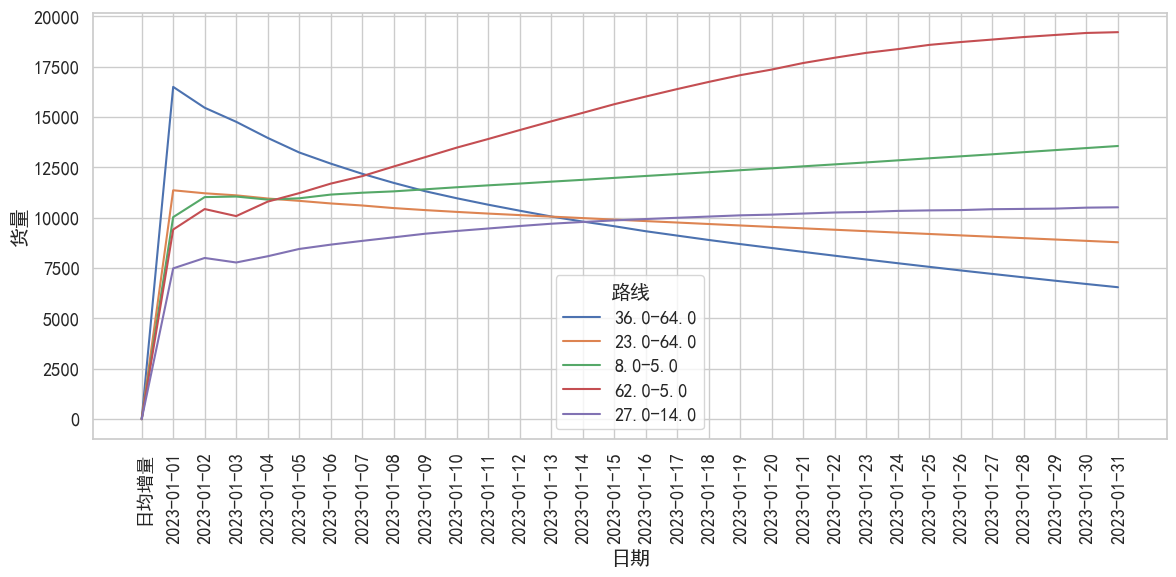

In [35]:
plt.figure(figsize=(12, 6))
sns.lineplot(仅仅线路变化的df只有2023路线长表, hue='路线', x='日期', y='货量')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('DC9关闭后线路负载增加.svg')
plt.show()